# 朴素贝叶斯分类器

In [1]:
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def plot_classifier(classifier, X, y):
    # 定义图形取值范围
    x_min, x_max = min(X[:, 0]) - 1, max(X[:, 0]) + 1
    y_min, y_max = min(X[:, 1]) - 1, max(X[:, 1]) + 1

    # 设置step
    step_size = 0.01
    # 定义网格
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size),
                                     np.arange(y_min, y_max, step_size))
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])  # 计算分类器输出结果
    mesh_output = mesh_output.reshape(x_values.shape)  # 数组维度变形

    # 画出分类结果
    plt.figure()
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidths=1, cmap=plt.cm.Paired)

    # 图形取值范围
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # 设置x，y轴
    plt.xticks((np.arange(int(min(X[:, 0]) - 1), int(max(X[:, 0]) + 1), 1.0)))
    plt.xticks((np.arange(int(min(X[:, 1]) - 1), int(max(X[:, 1]) + 1), 1.0)))

    plt.show()

## 数据导入

In [3]:
input_file = './data/data_multivar.txt'
X, y = [], []
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = [float(x) for x in line.split(',')]
        X.append(data[:-1])
        y.append(data[-1])

X, y = np.array(X), np.array(y)

In [7]:
cf_gauss = GaussianNB()
cf_gauss.fit(X, y)
y_pred = cf_gauss.predict(X)

准确率为 99.5 %


/var/folders/3k/hd12ckqx7pj1sxt3j9q7qrsm0000gn/T/ipykernel_36876/2634822676.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)


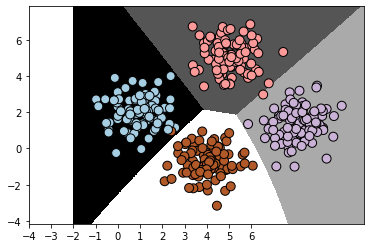

In [8]:
# 计算准确性
acc = 100.0 * (y == y_pred).sum() / X.shape[0]
print('准确率为', acc, '%')
plot_classifier(cf_gauss, X, y)